In [41]:
#All these packages need to be installed from pip
import sklearn
import sklearn.feature_extraction.text
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For KL divergence
import scipy #For KL divergence
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
%matplotlib inline
import os #For making directories
import io #for making http requests look like files

In [2]:
stop_words_nltk = nltk.corpus.stopwords.words('english')
snowball = nltk.stem.snowball.SnowballStemmer('english')

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None, vocab = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)

    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)

    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
        
    #We will return a list with the stopwords removed
    if vocab is not None:
        vocab_str = '|'.join(vocab)
        workingIter = (w for w in workingIter if re.match(vocab_str, w))
    
    return list(workingIter)

In [3]:
try:
    df = pandas.read_pickle('data/cmv_data.pkl')
    #edf = pandas.read_pickle('data/extrap.pkl')
except:
    df = pandas.read_pickle('cmv_data.pkl')
    #edf = pandas.read_pickle('extrap.pkl')

df = df.sample(frac = .1)

# cols = np.intersect1d(df.columns, edf.columns)
# edf = edf[cols]
# df.append(edf)
# df['exp'] = False
# edf['exp'] = True
# df = pd.concat([df, edf], axis=0)

#take out rows where comment is '[removed]' or '[deleted]'
df = df[(df['com_text']!='[deleted]')&(df['com_text']!='[removed]')]

df['tokenized_com'] = df['com_text'].apply(lambda x: nltk.word_tokenize(x))
df['normalized_com'] = df['tokenized_com'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

df['tokenized_sub'] = df['sub_text'].apply(lambda x: nltk.word_tokenize(x))
df['normalized_sub'] = df['tokenized_sub'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

#splitting data
# data_train, data_test = train_test_split(df, test_size=0.3, random_state=123)
# data_train['is_train'] = True
# data_test['is_train'] = False
# edf = df[df['exp']==True]


In [4]:
df[:5]

,sub_text,com_text,com_delta_received,com_delta_from_op,com_upvotes,tokenized_com,normalized_com,tokenized_sub,normalized_sub
com_id,,,,,,,,,
cbwsi7d,People today are so easily offended by casual ...,"The school can't really get away with this, bu...",False,False,1,"[The, school, ca, n't, really, get, away, with...","[school, ca, realli, get, away, far, parent, c...","[People, today, are, so, easily, offended, by,...","[peopl, today, easili, offend, casual, word, c..."
cvaq71h,"Two major arguments I have. \n\n1. In general,...","Sorry Shut_da_fuck_up_bot, your comment has be...",False,False,1,"[Sorry, Shut_da_fuck_up_bot, ,, your, comment,...","[sorri, comment, remov, comment, rule, rude, h...","[Two, major, arguments, I, have, ., 1, ., In, ...","[two, major, argument, general, rule, select, ..."
cueu3av,"First off, this is an exciting new subreddit f...",If a point of view is supported by group think...,False,False,5,"[If, a, point, of, view, is, supported, by, gr...","[point, view, support, group, think, doe, mean...","[First, off, ,, this, is, an, exciting, new, s...","[first, excit, new, subreddit, love, idea, how..."
ceat8pa,You can sort comments on Reddit (submissions t...,Things can be controversial for many different...,False,False,2,"[Things, can, be, controversial, for, many, di...","[thing, controversi, mani, differ, reason, onl...","[You, can, sort, comments, on, Reddit, (, subm...","[sort, comment, reddit, submiss, believ, contr..."
cj3wpir,There's several mitigating factors to rich peo...,They don't *have* to give anything.,False,False,2,"[They, do, n't, *have*, to, give, anything, .]","[give, anyth]","[There, 's, several, mitigating, factors, to, ...","[sever, mitig, factor, rich, peopl, generos, w..."


# Collocations

In [5]:
#Overview: just to get an idea of top bi/tri/quad/n-grams in all comments and the comments that receive delta
print("First, top 40 bigrams of all comments")
allBigrams = nltk.collocations.BigramCollocationFinder.from_words(df['normalized_com'].sum())
#print("There are {} bigrams in the finder".format(cpBigrams.N))
bigram_measures = nltk.collocations.BigramAssocMeasures()
allBigrams.score_ngrams(bigram_measures.student_t)[:40]

First, top 40 bigrams of all comments


[(('doe', 'mean'), 10.464401466807153),
 (('mani', 'peopl'), 8.953389675702558),
 (('feel', 'like'), 8.714150132028555),
 (('chang', 'view'), 8.114566852470945),
 (('lot', 'peopl'), 7.8446061015929756),
 (('make', 'sens'), 7.778129798216478),
 (('reason', 'whi'), 7.254474680915453),
 (('high', 'school'), 7.175853813161185),
 (('seem', 'like'), 7.165288180696215),
 (('even', 'though'), 7.1586704150516285),
 (('everyon', 'els'), 6.943722620109187),
 (('tl', 'dr'), 6.6315494649483595),
 (('first', 'place'), 6.630977507334409),
 (('let', 'say'), 6.572738958143521),
 (('year', 'old'), 6.440078483598249),
 (('pretti', 'much'), 6.384217373574809),
 (('sound', 'like'), 6.349588741984738),
 (('someon', 'els'), 6.307266325285223),
 (('black', 'peopl'), 6.242794093589202),
 (('year', 'ago'), 6.224239710933813),
 (('white', 'peopl'), 6.182869434747166),
 (('minimum', 'wage'), 6.160612242935322),
 (('someth', 'like'), 6.053584163791531),
 (('doe', 'make'), 5.803502968363975),
 (('men', 'women'), 5.

In [6]:
#For delta-receiving comments
print("Of delta-receiving comments")
deltaBigrams = nltk.collocations.BigramCollocationFinder.from_words(df[df['com_delta_received']]['normalized_com'].sum())
deltaBigrams.score_ngrams(bigram_measures.student_t)[:40]

Of delta-receiving comments


[(('minimum', 'wage'), 2.8234665542149067),
 (('child', 'support'), 2.8148982960245084),
 (('tl', 'dr'), 2.234285397798339),
 (('avoid', 'victim'), 2.212110106312292),
 (('rape', 'victim'), 2.1967086176917574),
 (('bin', 'laden'), 1.9987244897959184),
 (('oxford', 'comma'), 1.9984056122448979),
 (('appl', 'core'), 1.9980070153061225),
 (('punch', 'line'), 1.9977678571428572),
 (('financi', 'abort'), 1.990672831632653),
 (('larg', 'cake'), 1.9880420918367347),
 (('larg', 'group'), 1.9808673469387754),
 (('would', 'agre'), 1.9579081632653061),
 (('get', 'done'), 1.9508928571428572),
 (('mani', 'peopl'), 1.9426020408163265),
 (('would', 'like'), 1.7316645408163265),
 (('porch', 'light'), 1.7309461833293565),
 (('justic', 'movement'), 1.7306700272694762),
 (('wallet', 'stolen'), 1.7306700272694762),
 (('wast', 'materi'), 1.7305779752495163),
 (('feder', 'budget'), 1.7302097671696757),
 (('leav', 'porch'), 1.7301177151497156),
 (('steve', 'job'), 1.7301177151497156),
 (('social', 'justic'),

In [7]:
#trigrams
#For all
trigram_measures = nltk.collocations.TrigramAssocMeasures()
allTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df['normalized_com'].sum())
allTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('natur', 'way', 'thing'), 3.6043079879944746),
 (('mental', 'health', 'issu'), 3.4640394473164147),
 (('third', 'parti', 'candid'), 3.316609127317029),
 (('cultur', 'institut', 'marriag'), 2.9999873106581014),
 (('pay', 'child', 'support'), 2.9997932423411844),
 (('doe', 'make', 'sens'), 2.997893625517289),
 (('world', 'war', 'ii'), 2.828420460658309),
 (('destroy', 'cultur', 'institut'), 2.828420395206411),
 (('knowledg', 'good', 'evil'), 2.8283890818812676),
 (('vote', 'third', 'parti'), 2.828362610343406),
 (('mental', 'health', 'problem'), 2.828333498391499),
 (('black', 'live', 'matter'), 2.8281821763851536),
 (('larg', 'group', 'peopl'), 2.8273620739195837),
 (('make', 'feel', 'like'), 2.820159672331049),
 (('modern', 'western', 'nation'), 2.6457476658900743),
 (('lesser', 'two', 'evil'), 2.6457460861592708),
 (('look', 'modern', 'western'), 2.6457425131433814),
 (('western', 'nation', 'number'), 2.645741318258589),
 (('number', 'sexual', 'partner'), 2.6457345741426046),
 (('s

In [8]:
#Delta-receiving
#trigram_measures = nltk.collocations.TrigramAssocMeasures()
deltaTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df[df['com_delta_received']]['normalized_com'].sum())
deltaTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('leav', 'porch', 'light'), 1.7320495747293245),
 (('social', 'justic', 'movement'), 1.7320488262195957),
 (('bad', 'public', 'polici'), 1.732034824684672),
 (('child', 'support', 'child'), 1.731997971588033),
 (('pay', 'child', 'support'), 1.731983881993141),
 (('mother', 'ayn', 'rand'), 1.414213130969118),
 (('iowa', 'code', 'ann'), 1.4142129871677922),
 (('class', 'action', 'lawsuit'), 1.4142124838631522),
 (('design', 'cover', 'store'), 1.4142122681611635),
 (('critic', 'race', 'theori'), 1.414211944608181),
 (('legal', 'process', 'immigr'), 1.4142110458498953),
 (('keep', 'door', 'open'), 1.4142103268432666),
 (('critic', 'muslim', 'nation'), 1.4142097875882953),
 (('detract', 'qualiti', 'reddit'), 1.4142090326313355),
 (('know', 'provid', 'alcohol'), 1.41420612065449),
 (('best', 'case', 'scenario'), 1.4142057971015074),
 (('ensur', 'resourc', 'go'), 1.4142043590882503),
 (('safe', 'option', 'critic'), 1.414204125411096),
 (('victim', 'punch', 'line'), 1.4142014830617362),
 (('

In [9]:
# df['bigrams'] = df['normalized_com'].apply(lambda x: nltk.collocations.BigramCollocationFinder.from_words(x))
# df['bigrams'] = df['bigrams'].apply(lambda x: x.score_ngrams(bigram_measures.student_t)[:10])
# df['bigrams'][:10]

## TF-IDF feature matrix
and PCA to reduce dimension

In [42]:
#initialize tf-idf feature matrix
ngramTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3,ngram_range=(1, 10), stop_words='english', norm='l2')
#train
ngramTFVects = ngramTFVectorizer.fit_transform(df['com_text'])
ngramTFVects.shape

(2878, 1000)

In [43]:
#use PCA to reduce the feature matrix
PCA = sklearn.decomposition.PCA
pca = PCA().fit(ngramTFVects.toarray())
reduced_data = pca.transform(ngramTFVects.toarray())

# PCA = sklearn.decomposition.PCA
# pca = PCA().fit(subTFVects.toarray())


In [44]:
#pca.explained_variance_ratio_.shape
#ngramTFVects.toarray().shape
pca.explained_variance_ratio_.shape

(1000,)

ValueError: x and y must have same first dimension

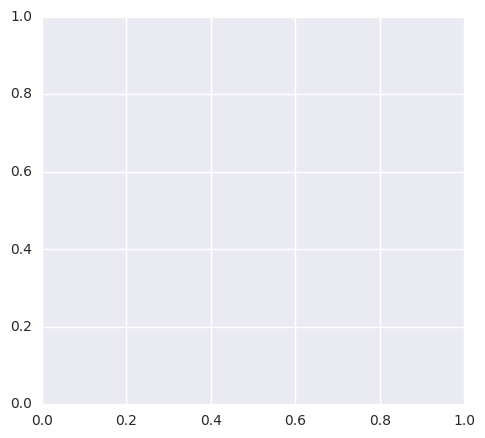

In [45]:
#use scree plot to determine the number of dimensions
n = ngramTFVects.shape[0]
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
eigen_vals = np.arange(n) + 1

# print(eigen_vals.shape)
# print(pca.explained_variance_ratio_.shape)
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=2)
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

ax2 = fig.add_subplot(122)
eigen_vals = np.arange(20) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax2.set_title('Scree Plot (First 20 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')
plt.show()

In [13]:
X = reduced_data[:, :15]

# KL and JS divergence

## KL
Overview part: Let's compare KL divergence between delta-receiving comments and the others

In [14]:
#set(df['normalized_sub'][0])
#df['normalized_sub'][0]

In [15]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

def comparison(df_a, df_b):
    words_a = set(df_a['normalized_com'].sum())
    words_b = set(df_a['normalized_com'].sum())
    #Change & to | if you want to keep all words
    overlapWords = words_a & words_b
    overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
    #print(overlapWordsDict['student'])
    
    aProbArray = makeProbsArray(df_a['normalized_com'], overlapWordsDict)
    bProbArray = makeProbsArray(df_b['normalized_com'], overlapWordsDict)
    return (aProbArray, bProbArray,overlapWordsDict)

In [16]:
#Elementwise divergence and see which words best distinguish the two corpora
tupl = comparison(df[df['com_delta_received']],df[df['com_delta_received']==False])
d_ndDivergence_ew = scipy.special.kl_div(*tupl[:2])
dic = tupl[2]
kl_df = pandas.DataFrame(list(dic.keys()), columns = ['word'], index = list(dic.values())).sort_index()
kl_df['elementwise divergence'] = d_ndDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
954,quadrillion,inf
416,gmt,inf
1428,vestigi,inf
439,notifi,inf
1444,cesspool,inf
1452,squeak,inf
425,tortilla,inf
418,cecil,inf
1459,douchy,inf
456,extrapol,inf


KL feature column

In [17]:
df['tuple'] = list(zip(df['sub_text'], df['com_text']))

In [18]:
def _kldiv(A, B):
    return np.sum([v for v in A * np.log2(A/B) if not np.isnan(v)])



def make_prob_array(norm_toks, overlap_dict):
        count_list = [0] * len(overlap_dict)

        for tok in norm_toks:
            try:
                count_list[overlap_dict[tok]] += 1
            except KeyError:
                pass
        count_array = np.array(count_list)
        return(count_array / count_array.sum())


def calc_kl_divergence(string1, string2):
    '''
    Calculates the kl Divergence between two sets of strings
    '''
    norm_toks1 = normlizeTokens(nltk.word_tokenize(string1), stopwordLst = stop_words_nltk, stemmer =  snowball)
    norm_toks2 = normlizeTokens(nltk.word_tokenize(string2), stopwordLst = stop_words_nltk, stemmer =  snowball)
    
    words1 = set(norm_toks1)
    words2 = set(norm_toks2)

    overlap_words = words1 & words2
    overlap_words_dict = {word: index for index, word in enumerate(overlap_words)}

    prob1 = make_prob_array(norm_toks1, overlap_words_dict)
    prob2 = make_prob_array(norm_toks2, overlap_words_dict)

    kl_div = _kldiv(prob1, prob2)
    return(kl_div)

In [19]:
df['KL'] = df['tuple'].apply(lambda x: calc_kl_divergence(x[0], x[1]))

## JS divergence

In [20]:
# From http://stackoverflow.com/questions/15880133/jensen-shannon-divergence
def jsdiv(P, Q):
    """Compute the Jensen-Shannon divergence between two probability distributions.

    Input
    -----
    P, Q : array-like
        Probability distributions of equal length that sum to 1
    """

    def _kldiv(A, B):
        return np.sum([v for v in A * np.log2(A/B) if not np.isnan(v)])

    P = np.array(P)
    Q = np.array(Q)

    M = 0.5 * (P + Q)

    return 0.5 * (_kldiv(P, M) +_kldiv(Q, M))


def make_prob_array(norm_toks, overlap_dict):
        count_list = [0] * len(overlap_dict)

        for tok in norm_toks:
            try:
                count_list[overlap_dict[tok]] += 1
            except KeyError:
                pass
        count_array = np.array(count_list)
        return(count_array / count_array.sum())


def calc_JS_divergence(string1, string2):
    '''
    Calculates the Jensen Shannon Divergence between two sets of strings
    '''
    norm_toks1 = normlizeTokens(nltk.word_tokenize(string1), stopwordLst = stop_words_nltk, stemmer =  snowball)
    norm_toks2 = normlizeTokens(nltk.word_tokenize(string2), stopwordLst = stop_words_nltk, stemmer =  snowball)
    
    words1 = set(norm_toks1)
    words2 = set(norm_toks2)

    overlap_words = words1 & words2
    overlap_words_dict = {word: index for index, word in enumerate(overlap_words)}

    prob1 = make_prob_array(norm_toks1, overlap_words_dict)
    prob2 = make_prob_array(norm_toks2, overlap_words_dict)

    js_div = jsdiv(prob1, prob2)
    return(js_div)

In [22]:

df['JS'] = df['tuple'].apply(lambda x: calc_JS_divergence(x[0], x[1]))

In [ ]:
df[:10]

In [ ]:
df[df['com_delta_received']]['JS'].median()

In [ ]:
df[df['com_delta_received']==False]['JS'].median()

In [ ]:
df[df['com_delta_received']]['KL'].median()

In [ ]:
df[df['com_delta_received']==False]['KL'].median()

Delta-receiving comments have significantly higher JS divergence from the original posts than the other comments; they also have much higher KL divergence. 

Maybe this shows that these comments are able to raise more angles/perspectives?